<a href="https://colab.research.google.com/github/paulodeluna/Data_Visualization_cs06/blob/main/Data_Visualization_cs06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import io
import altair as alt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
from google.colab import files
import csv

uploaded = files.upload()

Saving spotify_data1.csv to spotify_data1.csv


In [6]:
data = pd.read_csv("spotify_data1.csv")
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
#@title Pick a subset of the data { run: "auto" }

selection_method = 'artists' #@param ['songs', 'artists', 'danceability']


In [8]:
artist_names = ['Janet Jackson','FIDLAR','Pink Floyd','alt-J','Hot Chip','Passion Pit','Kavinsky','Kings of Leon','Arctic Monkeys','The Killers','Beastie Boys',
'Michael Jackson','Kesha','Shakira','The Goo Goo Dolls','J. Cole','The xx','Jack White','The Chambers Brothers','Calvin Harris','Nickelback','The Rapture',
'Florence + The Machine','Fall Out Boy','Incubus','Panic! At The Disco','The Black Keys','Pearl Jam','Future','Maroon 5','Bill Withers','Radiohead',
'Deep Purple','Machine Gun Kelly','DJ Khaled','Bob Marley & The Wailers','Ludwig van Beethoven','Snoop Dogg','Ice Cube','Vanilla Ice','Drake','Daft Punk',
'Selena Gomez & The Scene','Selena Gomez','Eminem','Jimi Hendrix','LCD Soundsystem','The Lumineers','Vampire Weekend','The Kooks','David Bowie',
'Yeah Yeah Yeahs','Avril Lavigne','Amy Winehouse','deadmau5','David Guetta','Gym Class Heroes','Céline Dion','Leon Bridges','The Beach Boys',
'Bruno Mars','Spice Girls','JAY Z','Miley Cyrus','James Brown','P!nk','Nina Simone','Rihanna','Foo Fighters','The Clash','4 Non Blondes',
'John Mayer','Katy Perry','Lil Dicky','Lady Gaga',]


song_names = ['Ludwig van Beethove', 'Eminem']

In [9]:
# subset is a subset of the original data.
# where I selected only the smallest, highest and in between value from the dataset for danceability,
# Some of the most known bands from the dataset for artist and,
# correlation Between songs for songs.

#### Idealy you would prompt the user for their favorite band or songs to then make it a comparison ####

# I then created a new column named url and filled in values with links to google.com.

# I also re-indexed the original values to start from 0 to n-1.

import altair as alt

if selection_method=='songs':
  subset = pd.DataFrame(columns=data.columns)
  for i in range(len(data)):
    if data['song_title'][i] in song_names:
      subset = subset.append(data.iloc[i])

elif selection_method=='artists':
  subset = pd.DataFrame(columns=data.columns)
  for i in range(len(data)):
    if data['artist'][i] in artist_names:
      subset = subset.append(data.iloc[i])

elif selection_method=='danceability':
  over48 = data[.497<data["danceability"]]
  alsounder52 = over48["danceability"]<.5
  middle = over48[alsounder52]

  dance_cutoff = data["danceability"] >= .93
  dance_cutoff2 = data["danceability"] <=.15

  subset = data[dance_cutoff].append(middle).append(data[dance_cutoff2])

subset['url']='https://www.google.com'
subset = subset.reset_index()
subset.head()

,index,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,url
0,0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,https://www.google.com
1,2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,https://www.google.com
2,5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake,https://www.google.com
3,6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake,https://www.google.com
4,21,21,0.00024,0.747,307680,0.740,0.369000,1,0.0995,-4.134,1,0.0323,130.031,4.0,0.770,1,House of Jealous Lovers,The Rapture,https://www.google.com


In [10]:
# This query gets the name of the artist, name of the song, a string: "youtube" and, returns
# link which I then embeded to be able to visualize here in Colab

#allows me to run a query on google
from googlesearch import search

for i in range(len(subset)):

  query = 'youtube ' + subset['song_title'][i] + ' ' + subset['artist'][i]
  print(query)
  result = search(query, tld='com', lang='en', num=10, start=0, stop=None, pause=2)
  tries =0
  url=''
  while 'www.youtube.com' not in url:
    url = next(result)
    print(f'Song {i}: result: {url}')
    if tries ==5: break
    tries += 1
  subset['url'][i] = url.replace('https://www.youtube.com/watch?v=', 'https://www.youtube.com/embed/')

# this link bellow had to be hardcoded because the query fail to give me the right link
if selection_method=='danceability':
  subset.url[1] = 'https://www.youtube.com/embed/HHb8tI-hM7w'
  

youtube Mask Off Future
Song 0: result: https://www.youtube.com/watch?v=xvZqHgFz51I
youtube Xanny Family Future


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Song 1: result: https://www.youtube.com/watch?v=iWga74teAN4
youtube Sneakin’ Drake
Song 2: result: https://www.youtube.com/watch?v=YlxMgXacV-A
youtube Childs Play Drake
Song 3: result: https://www.youtube.com/watch?v=2F2GlWMb_l4
youtube House of Jealous Lovers The Rapture
Song 4: result: https://www.youtube.com/watch?v=6HP04nfUi4g
youtube Jumpman Drake
Song 5: result: https://www.youtube.com/watch?v=eIaR1IsAGwY
youtube Coming Home Leon Bridges
Song 6: result: https://www.youtube.com/watch/MTrKkqE9p1o
youtube I Shall Be Released - Remastered Nina Simone
Song 7: result: https://www.youtube.com/watch?v=XyCn8IC5RpE
youtube The Payback James Brown
Song 8: result: https://www.youtube.com/watch?v=IST6qRfVqwY
youtube The Magnificent Seven - Remastered The Clash
Song 9: result: https://www.youtube.com/watch?v=-Aj92HNB8Tc
youtube Hotline Bling Drake
Song 10: result: https://www.youtube.com/watch?v=uxpDa-c-4Mc
youtube Blood On the Money Future
Song 11: result: https://www.youtube.com/watch?v=2y-e

In [12]:

# CLICK THE SCATTER PLOT!!! :) 

import altair as alt

point = alt.Chart(subset).transform_calculate(
    url=alt.datum.url
).mark_point().encode(
    alt.X('valence',axis=alt.Axis(format='.0%', grid=False,title='Song Mood')),
    alt.Y('danceability',axis=alt.Axis(format='.0%', grid=False,title='Dance-ometer')),
    color=alt.Color('energy', scale=alt.Scale(scheme='purplered')),
    opacity=alt.value(0.2),
    href='url:N',
    tooltip=['song_title', 'artist']
).properties(
    title= 'Rate It Again, Sam',
    width=600,
    height=400,
)

point.configure_title(
    fontSize=50,
    font='Ariel',
    anchor='start',
    color='gray'
)

text1 = alt.Chart({'values':[{'x': 0.80, 'y': 0.91, 'message':'I Wanna Dance!'}]}).mark_text(
    text='💃', angle=345, fontSize=40
).encode(
    x='x:Q', y='y:Q',
    tooltip='message:N'
)

text2 = alt.Chart({'values':[{'x': 0.15, 'y': 0.15, 'message':'I Don\'t Dance'}]}).mark_text(
    text='🤷‍♂️', angle=0, fontSize=40
).encode(
    x='x:Q', y='y:Q',
    tooltip='message:N'
  )

text3 = alt.Chart({'values':[{'x': 0.8, 'y': 0.9}]}).mark_text(
    text='Relationship Between Danceability and Valance - Spotify Dataset', angle=0,fontSize=19, fontWeight=300,opacity=1,dx=500, dy=0
).encode(
    x='x:Q', y='y:Q'
  )


text4 = alt.Chart({'values':[{'x': 0.8, 'y': 0.9}]}).mark_text(
    text='Valence: Describes the musical positiveness conveyed by a track.',
    angle=0,fontSize=12, fontWeight=200,opacity=1,dx=500, dy=60
).encode(
    x='x:Q', y='y:Q'
  )

text5 = alt.Chart({'values':[{'x': 0.8, 'y': 0.9}]}).mark_text(
    text='Tracks with high valence sound more positive (e.g. happy, cheerful,euphoric),',
     angle=0,fontSize=12, fontWeight=200,opacity=1,dx=497, dy=80
).encode(
    x='x:Q', y='y:Q'
  )

text6 = alt.Chart({'values':[{'x': 0.8, 'y': 0.9}]}).mark_text(
    text='while tracks with low valence sound more negative (e.g. sad, depressed, angry).',
    angle=0,fontSize=12, fontWeight=200,opacity=1,dx=500, dy=100
).encode(
    x='x:Q', y='y:Q'
  )

text7 = alt.Chart({'values':[{'x': 0.8, 'y': 0.9}]}).mark_text(
    text='Energy: Represents a perceptual measure of intensity and activity.',
     angle=0,fontSize=12, fontWeight=200,opacity=1,dx=500, dy=120
).encode(
    x='x:Q', y='y:Q'
  )

result = alt.layer(point, text1, text2, text3,text4,text5,text6,text7
                   ).configure_mark(
                    opacity=1,
  )

result



alt.LayerChart(...)

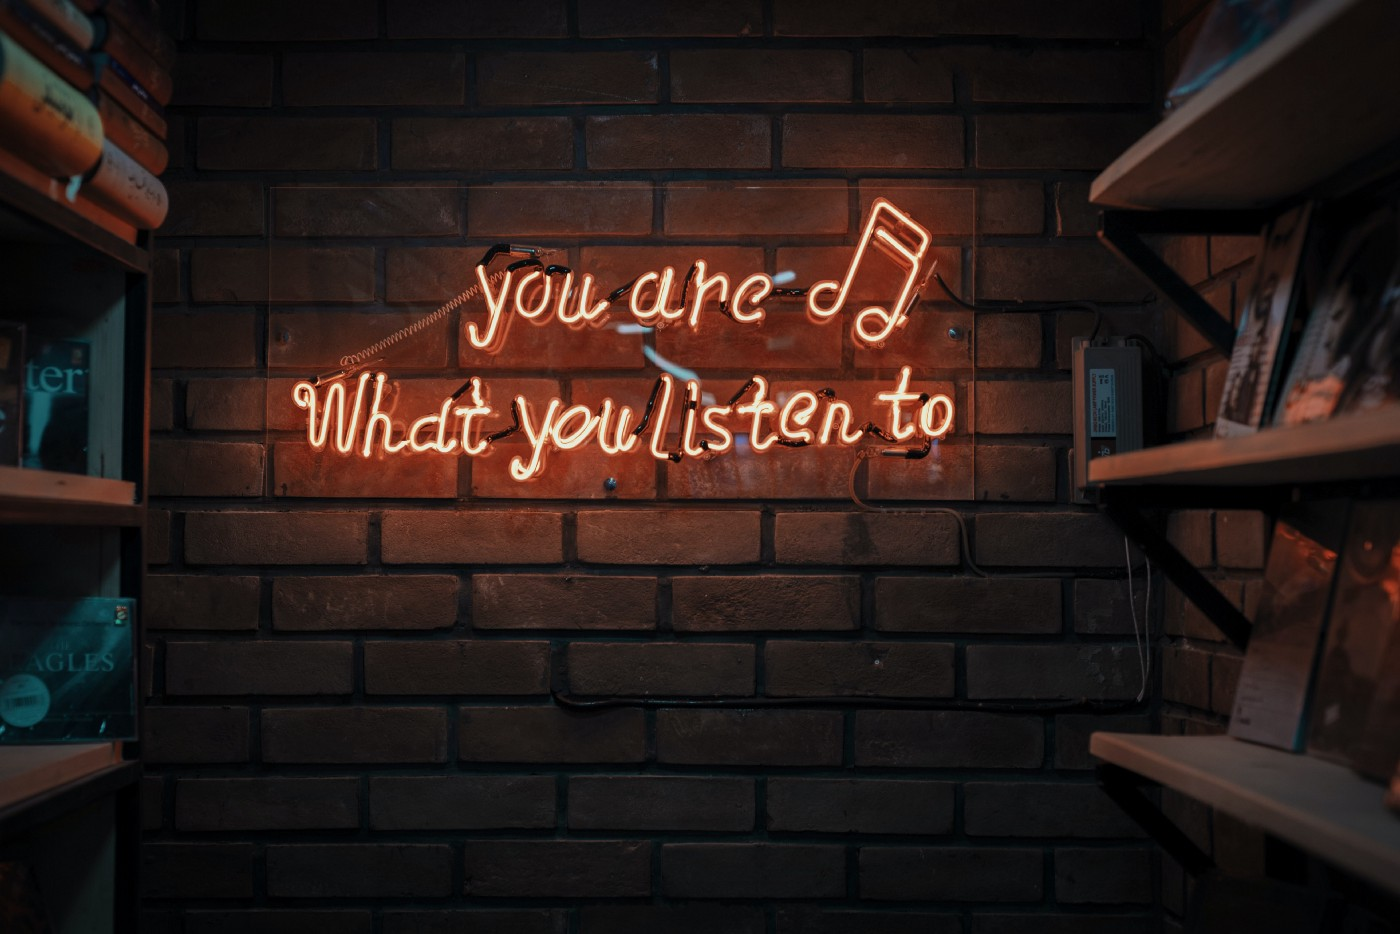




